#<font color="red">Details/Data-Definitions</font>

The engagement data are based on [LearnPlatform](https://learnplatform.com/)’s Student Chrome Extension. The extension collects page load events of over 10K education technology products in their product library. The engagement data have been aggregated at school district level, and each file represents data from one school district. The product file includes information about the characteristics of the top 372 products with most users in 2020. The district file includes information about the characteristics of school districts, including data from [National Center for Education Statistics (NCES)](https://nces.ed.gov/), [The Federal Communications Commission (FCC)](https://www.fcc.gov/), and [Edunomics Lab](https://edunomicslab.org/).

## File Structure

The organization of data sets is described below:

```
Root/
  -engagement_data/
    -1000.csv
    -1039.csv
    -...
  -districts_info.csv
  -products_info.csv
  -README.md

```

## Data Definition


### Engagement data
The engagement data are aggregated at school district level, and each file in the folder `engagement_data` represents data from one school district. The 4-digit file name represents `district_id` which can be used to link to district information in `district_info.csv`. The `lp_id` can be used to link to product information in `product_info.csv`.

| Name | Description |
| :--- | :----------- |
| time | date in "YYYY-MM-DD" |
| lp_id | The unique identifier of the product |
| pct_access | Percentage of students in the district have at least one page-load event of a given product and on a given day |
| engagement_index | Total page-load events per one thousand students of a given product and on a given day |


### District information data

The district file `districts_info.csv` includes information about the characteristics of school districts, including data from [NCES](https://nces.ed.gov/) (2018-19), [FCC](https://www.fcc.gov/) (Dec 2018), and [Edunomics Lab](https://edunomicslab.org/). Some identifiable information about the school districts have been removed. An open source tool [ARX](https://arx.deidentifier.org/) [(Prasser et al. 2020)](https://onlinelibrary.wiley.com/doi/full/10.1002/spe.2812) has been used o transform several data fields and reduce the risks of re-identification. For data generalization purposes some data points are released with a range where the actual value falls under. Additionally, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset. 

| Name | Description |
| :--- | :----------- |
| district_id | The unique identifier of the school district |
| state | The state where the district resides in |
| locale | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural.|
| pct_black/hispanic | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
| pct_free/reduced | Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data |
| county_connections_ratio | `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). |
| pp_total_raw | Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and the median value has been used to represent the expenditure of a given school district. |


### Product information data
The product file `products_info.csv` includes information about the characteristics of the top 372 products with most users in 2020. The categories listed in this file are part of LearnPlatform's product taxonomy. Data were labeled by Learn Platform's team. Some products may not have labels due to being duplicate, lack of accurate url or other reasons.

| Name | Description |
| :--- | :----------- |
| LP ID| The unique identifier of the product |
| URL | Web Link to the specific product |
| Product Name | Name of the specific product |
| Provider/Company Name | Name of the product provider |
| Sector(s) | Sector of education where the product is used |
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled |

## License

This work is licensed under a
[Creative Commons Attribution-ShareAlike 4.0 International License][cc-by-sa].

[![CC BY-SA 4.0][cc-by-sa-image]][cc-by-sa]

[cc-by-sa]: http://creativecommons.org/licenses/by-sa/4.0/
[cc-by-sa-image]: https://licensebuttons.net/l/by-sa/4.0/88x31.png
[cc-by-sa-shield]: https://img.shields.io/badge/License-CC%20BY--SA%204.0-lightgrey.svg

Source of the above information: [LearnPlatform COVID-19 Impact on Digital Learning](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview) challenge on Kaggle.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
!pip install bokeh

#<font color="red">Cleaning and Processing the engagement_data</font>

In [ ]:
path_engagement_data = "/content/drive/MyDrive/Kaggle/LearnPlatform"

In [ ]:
engagement_data = os.listdir(path_engagement_data + "/engagement_data")

# total number of districts whose info we have
len(engagement_data)

233

In [ ]:
# putting all the districts and their data together (from engagement_data folder) in a csv file:-

engagement_data_csv = open("engagement_data.csv","w+")
engagement_data_csv.write("district_id,"+"time,"+"lp_id,"+"pct_access,"+"engagement_index")
engagement_data_csv.write("\n")

for file in tqdm(engagement_data):
  with open(path_engagement_data + "/engagement_data" + "/" + file) as f:
    dist_id = file.split(".")[0]
    all_lines = f.readlines()[1:]
    for line in all_lines:
      engagement_data_csv.write(dist_id + "," + line)
engagement_data_csv.close()    

100%|██████████| 233/233 [01:45<00:00,  2.22it/s]


In [2]:
engagement_data_csv = pd.read_csv("/content/drive/MyDrive/Kaggle/LearnPlatform/engagement_data.csv")
print(engagement_data_csv.shape)
engagement_data_csv.head(2)

(22324190, 5)


,district_id,time,lp_id,pct_access,engagement_index
0,1044,2020-01-01,99792.0,0.02,2.26
1,1044,2020-01-01,80493.0,0.01,0.17


In [ ]:
engagement_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22324190 entries, 0 to 22324189
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   district_id       int64  
 1   time              object 
 2   lp_id             float64
 3   pct_access        float64
 4   engagement_index  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 851.6+ MB


In [ ]:
engagement_data_csv.isna().sum()

district_id               0
time                      0
lp_id                   541
pct_access            13447
engagement_index    5378409
dtype: int64

<b><font color="8fce00#">What we see is: the columns <font color="red">pct_access</font> and <font color="red">engagement_index</font> have multiple NaN valued rows.
<br>
<font color="#8e7cc3">1. pct_access - Percentage of students in the district have at least one page-load event of a given product and on a given day</font><br>
<font color="#8e7cc3">2. engagement_index - Total page-load events per one thousand students of a given product and on a given day</font>
<br>
In the case of above 2 features, we may as well replace these NaN rows with 0 value, in which case, the rows with 0 can simply be depicted as:
<br>
<font color="#8e7cc3">1. if pct_access=0 --> 0% students in the district have at least one page-load event of a given product and on a given day</font><br>
<font color="#8e7cc3">2. if engagement_index=0 --> 0 Total page-load events per one thousand students of a given product and on a given day</font>
<br>
Also, there are only 541 rows in which there's no lp_id - The unique identifier of the product. We can drop these rows since, even after dropping these rows, we'll have sufficient data left with us.
</font></b>

In [3]:
# replacing NaN rows in both, pct_access and engagement_index columns:-

engagement_data_csv['pct_access'] = engagement_data_csv['pct_access'].fillna(0)
engagement_data_csv['engagement_index'] = engagement_data_csv['engagement_index'].fillna(0)
engagement_data_csv = engagement_data_csv.dropna()

print("Details of NaN values among each feature in our data:-")
print()
print(engagement_data_csv.isna().sum())
print()
print("Shape of our engagement_data_csv= ",engagement_data_csv.shape)

Details of NaN values among each feature in our data:-

district_id         0
time                0
lp_id               0
pct_access          0
engagement_index    0
dtype: int64

Shape of our engagement_data_csv=  (22323649, 5)


<b><font color="8fce00#">We are now good to go with engagement data</font></b>

In [ ]:
engagement_data_csv.head(2)

,district_id,time,lp_id,pct_access,engagement_index
0,1044,2020-01-01,99792.0,0.02,2.26
1,1044,2020-01-01,80493.0,0.01,0.17


#<font color="red">Cleaning, Processing and Analyzing the districts_info data</font>

In [4]:
districts_info = pd.read_csv("/content/drive/MyDrive/Kaggle/LearnPlatform/districts_info.csv")

print(districts_info.shape)
districts_info.head(2)

(233, 7)


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
districts_info.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

<b><font color="8fce00#">As per the data definitions provided, there are many missing data marked as 'NaN' indicating that the data was suppressed to maximize anonymization of the dataset. And hence, let's replace the NaN values in these places such as:
<br>
1."NaN" values in <font color="red">"state"</font> column are replaced with <font color="red">"AnonymousState"</font>.
<br>
2."NaN" values in <font color="red">"locale"</font> column are replaced with <font color="red">"AnonymousLocale"</font>.
<br>
3."NaN" values in <font color="red">"pct_black/hispanic"</font> column are replaced with <font color="red">"AnonymousPctBlkHispanic"</font>.
<br>
4."NaN" values in <font color="red">"pct_free/reduced"</font> column are replaced with <font color="red">"AnonymousFreeRed"</font>.
<br>
5."NaN" values in <font color="red">"county_connections_ratio"</font> column are replaced with <font color="red">"AnonymousConnRatio"</font>.
<br>
6."NaN" values in <font color="red">"pp_total_raw"</font> column are replaced with <font color="red">"AnonymousExpend"</font>.</font></b>

In [5]:
replace_with= {"state":"AnonymousState",
               "locale":"AnonymousLocale",
               "pct_black/hispanic":"AnonymousPctBlkHispanic",
               "pct_free/reduced":"AnonymousFreeRed",
               "county_connections_ratio":"AnonymousConnRatio",
               "pp_total_raw":"AnonymousExpend"}
districts_info = districts_info.fillna(value=replace_with)               

In [ ]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     233 non-null    object
 2   locale                    233 non-null    object
 3   pct_black/hispanic        233 non-null    object
 4   pct_free/reduced          233 non-null    object
 5   county_connections_ratio  233 non-null    object
 6   pp_total_raw              233 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
districts_info.isna().sum()

district_id                 0
state                       0
locale                      0
pct_black/hispanic          0
pct_free/reduced            0
county_connections_ratio    0
pp_total_raw                0
dtype: int64

<b><font color="8fce00#">We are now good to go with districts_info data</font></b>

In [ ]:
districts_info.head(2)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,AnonymousState,AnonymousLocale,AnonymousPctBlkHispanic,AnonymousFreeRed,AnonymousConnRatio,AnonymousExpend


In [ ]:
districts_info.shape

(233, 7)

#<font color="red">Cleaning, Processing and Analyzing the products_info data</font>

In [6]:
products_info = pd.read_csv("/content/drive/MyDrive/Kaggle/LearnPlatform/products_info.csv")

print(products_info.shape)
products_info.head(10)

(372, 6)


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [ ]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [ ]:
products_info.isna().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

<b><font color="8fce00#">As per the data definitions provided, some products may not have labels due to being duplicate, lack of accurate url or other reasons. And hence, let's replace the NaN values in these places such as:
<br>
1."NaN" values in <font color="red">"Provider/Company Name"</font> column are replaced with <font color="red">"MissingCompany"</font>.
<br>
2."NaN" values in <font color="red">"Sector(s)"</font> column are replaced with <font color="red">"MissingSector"</font>.
<br>
3."NaN" values in <font color="red">"Primary Essential Function"</font> column are replaced with <font color="red">"MissingPEC"</font>
</font></b>

In [7]:
replace_with= {"Provider/Company Name":"MissingCompany",
               "Sector(s)":"MissingSector",
               "Primary Essential Function":"MissingPEC"}
products_info = products_info.fillna(value=replace_with)               

In [ ]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       372 non-null    object
 4   Sector(s)                   372 non-null    object
 5   Primary Essential Function  372 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [ ]:
products_info.isna().sum()

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

<b><font color="8fce00#">We are now good to go with products_info data</font></b>

In [8]:
products_info.head(10)

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


<b><font color="8fce00#">Note: My target was to retain as much data as possible. That's why I encoded the NaN values with some value suitable to each column.</font></b>

#<font color="red">Analysis of engagement data and districts_info merged together</font>

In [9]:
engagement_plus_district_info = pd.merge(engagement_data_csv,districts_info,on="district_id")
engagement_plus_district_info.shape

(22323649, 11)

<b><font color="8fce00#">Let's bring the state column together with the district ids for convenience</font></b>

In [10]:
state = engagement_plus_district_info['state']
engagement_plus_district_info = engagement_plus_district_info.drop(columns=['state'],axis=1)
engagement_plus_district_info.insert(1,'state',state)
engagement_plus_district_info.head(2)

,district_id,state,time,lp_id,pct_access,engagement_index,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,1044,Missouri,2020-01-01,99792.0,0.02,2.26,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000["
1,1044,Missouri,2020-01-01,80493.0,0.01,0.17,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000["


In [11]:
#processing the time column for convenience
engagement_plus_district_info['time'] = pd.to_datetime(engagement_plus_district_info['time'])

In [ ]:
engagement_plus_district_info.head(2)

,district_id,state,time,lp_id,pct_access,engagement_index,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,1044,Missouri,2020-01-01,99792.0,0.02,2.26,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000["
1,1044,Missouri,2020-01-01,80493.0,0.01,0.17,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000["


##<font color="red">Analysis-1</font>

<b><font color="8fce00#">Let's analyse the median (since it is robust towards outliers, in case any) pct_access values w.r.t. each range of pct_black/hispanic given.</font></b>

Median pct_access w.r.t. each range of pct_black/hispanic given:-
-----------------------------------------------
pct_black/hispanic
AnonymousPctBlkHispanic    0.02
[0, 0.2[                   0.02
[0.2, 0.4[                 0.02
[0.4, 0.6[                 0.01
[0.6, 0.8[                 0.01
[0.8, 1[                   0.03
Name: pct_access, dtype: float64
---------------------------------------------------------------------------------------------------------


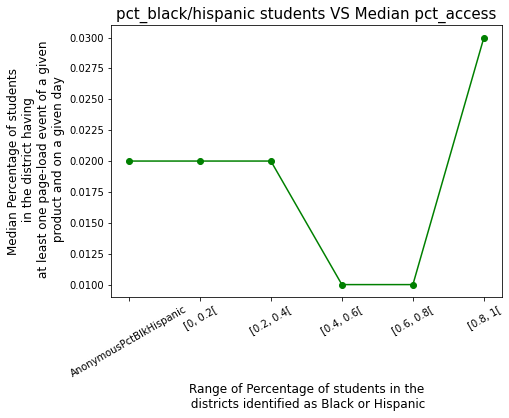

In [ ]:
black_hispanic_median1 = engagement_plus_district_info.groupby('pct_black/hispanic')['pct_access'].median()
print("Median pct_access w.r.t. each range of pct_black/hispanic given:-")
print("-----------------------------------------------")
print(black_hispanic_median1)

print("---------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(7,5))
plt.title("pct_black/hispanic students VS Median pct_access",fontdict={'fontsize':15})
plt.plot(list(black_hispanic_median1.index),black_hispanic_median1,color="green",marker="o")
plt.xticks(rotation=30)
plt.xlabel('Range of Percentage of students in the\n districts identified as Black or Hispanic',fontsize=12)
plt.ylabel('Median Percentage of students\n in the district having\n at least one page-load event of a given\n product and on a given day',fontsize=12)
plt.show()

<b><font color="#8e00ff">Observations:-
<br>
1. All the places where the percentage of black/hispanic students is high, i.e. the percentage of Black/Hispanic students lie in the range [0.8,1], have a higher percentage of at-least 1 page-load event of a given product and on a single day.
2. The places where the percentage of black/hispanic students fall in the range of [0.4-0.6] and [0.6-0.8] need more focus, as they have almost close to 0 (i.e.0.01%) of page-load events for a given product or on a given day.</font></b>

In [ ]:
print("Below mentioned states have pct_black/hispanic in the ranges of '[0.4, 0.6[' and '[0.6, 0.8['")
lst1 = engagement_plus_district_info[engagement_plus_district_info['pct_black/hispanic']=='[0.4, 0.6[']['state'].unique()
lst2 = engagement_plus_district_info[engagement_plus_district_info['pct_black/hispanic']=='[0.6, 0.8[']['state'].unique()
print(set(list(lst1)+list(lst2)))

Below mentioned states have pct_black/hispanic in the ranges of '[0.4, 0.6[' and '[0.6, 0.8['
{'Illinois', 'Virginia', 'Florida', 'District Of Columbia', 'Michigan', 'North Carolina', 'California', 'Massachusetts', 'Ohio', 'Connecticut', 'Minnesota', 'Texas', 'Washington'}


In [ ]:
cor = engagement_data_csv['pct_access'].corr(engagement_data_csv['engagement_index'])
print(f"The correlation between pct_access and engagement_index is {cor}")

The correlation between pct_access and engagement_index is 0.752007504225025


<b><font color="#8e00ff">Observations:-
<br>
There's a positive correlation of 0.752 between pct_access & engagement_index, which is an expected behavior because, more the percentage of at-least 1 page-load event, more is the engagement_index.</font></b>

<b><font color="8fce00#">Let's analyse the median (since it is robust towards outliers, in case any) engagement_index values w.r.t. each range of pct_black/hispanic given.</font></b>

Median engagement_index w.r.t. each range of pct_black/hispanic given:-
-----------------------------------------------
pct_black/hispanic
AnonymousPctBlkHispanic    0.74
[0, 0.2[                   0.81
[0.2, 0.4[                 0.50
[0.4, 0.6[                 0.42
[0.6, 0.8[                 0.36
[0.8, 1[                   1.32
Name: engagement_index, dtype: float64
---------------------------------------------------------------------------------------------------------


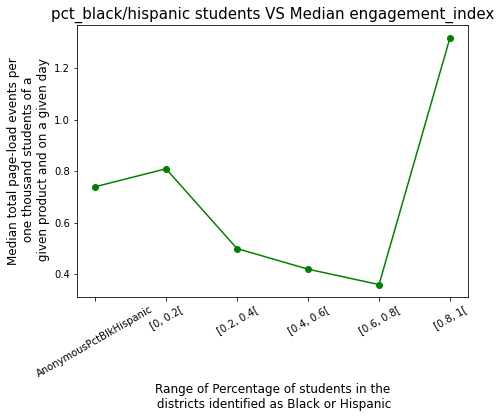

In [ ]:
black_hispanic_median2 = engagement_plus_district_info.groupby('pct_black/hispanic')['engagement_index'].median()
print("Median engagement_index w.r.t. each range of pct_black/hispanic given:-")
print("-----------------------------------------------")
print(black_hispanic_median2)

print("---------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(7,5))
plt.title("pct_black/hispanic students VS Median engagement_index",fontdict={'fontsize':15})
plt.plot(list(black_hispanic_median2.index),black_hispanic_median2,color="green",marker="o")
plt.xticks(rotation=30)
plt.xlabel('Range of Percentage of students in the\n districts identified as Black or Hispanic',fontsize=12)
plt.ylabel('Median total page-load events per\n one thousand students of a\n given product and on a given day',fontsize=12)
plt.show()

<b><font color="#8e00ff">Observations:-
<br>
The trend is more or less similar to what we saw in case of pct_access feature.Also, note: the similar trend of engagement_index also proves the presence of a postive correlation with pct_access.</font></b>

##<font color="red">Anslysis-2</font>

In [ ]:
monthwise_eng_index

,locale,January,February,March,April,May,June,July,August,September,October,November,December
0,AnonymousLocale,0.79,0.99,1.01,0.97,0.88,0.31,0.17,0.19,0.76,0.89,0.89,0.93
1,City,0.40,0.53,0.53,0.48,0.41,0.21,0.11,0.12,0.37,0.49,0.47,0.48
2,Rural,1.98,2.54,2.72,1.88,1.84,0.92,0.00,0.20,1.32,1.70,1.69,1.87
3,Suburb,0.71,0.96,1.01,0.88,0.80,0.38,0.17,0.14,0.55,0.71,0.71,0.77
4,Town,1.30,1.67,1.98,1.88,1.34,0.28,0.00,0.23,0.79,0.99,1.09,1.11


In [ ]:
#https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas
#https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

monthwise_eng_index = engagement_plus_district_info.groupby(['locale',engagement_plus_district_info['time'].dt.strftime('%B')])['engagement_index'].mean()
monthwise_eng_index = monthwise_eng_index.reset_index()

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html
#https://www.geeksforgeeks.org/convert-a-column-to-row-name-index-in-pandas/
monthwise_eng_index = monthwise_eng_index.pivot(index='locale',columns='time',values='engagement_index')
monthwise_eng_index = monthwise_eng_index.sort_index(axis=1)

#https://stackoverflow.com/questions/43756052/transform-pandas-pivot-table-to-regular-dataframe
monthwise_eng_index = pd.DataFrame(monthwise_eng_index.to_records())

months_ordered = ['January','February','March','April','May','June','July','August','September','October','November','December']
locale_col = monthwise_eng_index['locale']
monthwise_eng_index = monthwise_eng_index.drop(columns=['locale'],axis=1)[months_ordered]
monthwise_eng_index.insert(0,'locale',locale_col)

print(monthwise_eng_index.shape)
monthwise_eng_index.head(2)

(5, 13)


,locale,January,February,March,April,May,June,July,August,September,October,November,December
0,AnonymousLocale,88.748482,133.643676,133.563790,125.544078,97.608656,36.583105,22.509845,84.568250,163.448193,149.219060,139.504749,147.360464
1,City,52.255702,82.189483,87.144525,91.433939,74.091451,42.612418,20.082606,71.359301,135.535564,128.403278,111.331157,109.080894


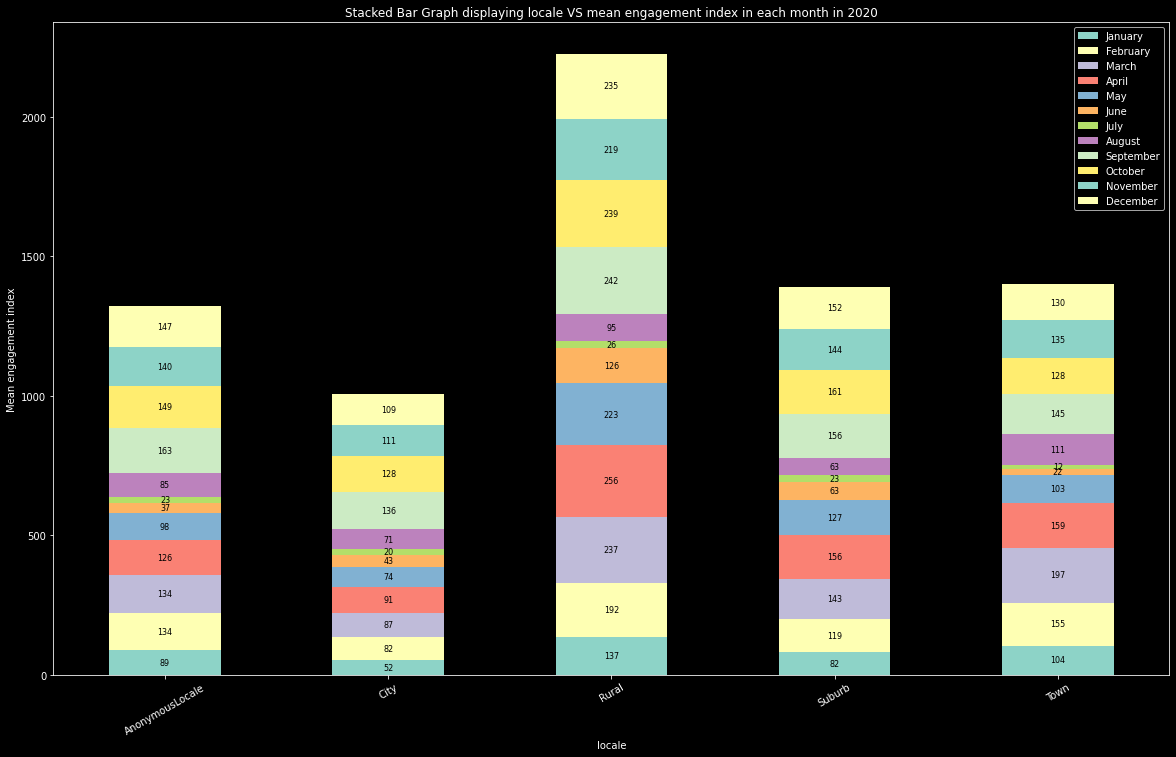

In [ ]:
#https://www.py4u.net/discuss/246630
ax = monthwise_eng_index.plot.bar(x="locale",
                                      stacked=True,
                                      figsize=(20,12),
                                      title='Stacked Bar Graph displaying locale VS mean engagement index in each month in 2020')
# plt.legend(loc='upper center',ncol=12)
plt.style.use('dark_background')
plt.xticks(rotation=30)
plt.ylabel('Mean engagement index')

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8, color="black")        

<b><font color="#8e00ff">Observations:-
<br>
1. 1st and foremost information we can retrieve from the above plot is that --> mean engagement_index drastically reduced in the months of June and July in every type of locality. And this is expected, because, COVID-19 hit the most in these months and the rise of COVID-19 cases took a steep curve starting from May-June-July. This can also be verified from [Number of cumulative cases of coronavirus (COVID-19) in the United States from January 20, 2020 to September 24, 2021, by day](https://www.statista.com/statistics/1103185/cumulative-coronavirus-covid19-cases-number-us-by-day/).
2. Note: The engegment_index started rising in the months after June-July, as compared to what they were, before June-July --> indicating that the quest of Digtal Learning and Usage of Digital learning platforms started rising post and during COVID after the dust started settling down.
<br>
Above 2 points answer the question <font color="red">What is the picture of digital connectivity and engagement in 2020?</font>
<br>
3. Hence, to answer the question mentioned in [LearnPlatform COVID-19 Impact on Digital Learning](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview),<font color="red">What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?</font> --> COVID-19 has influcenced the online and distance learning to such an extent that, this trend of high dependency and interest on it is pretty likely to continue in future as well (pandemic or not).
4. Rural areas had the highest mean engagement_index and the City areas had the least.</font></b>

##<font color="red">Analysis-3</font>

In [ ]:
engagement_plus_district_info['county_connections_ratio'].unique()

array(['AnonymousConnRatio', '[0.18, 1[', '[1, 2['], dtype=object)

In [ ]:
a = engagement_plus_district_info.groupby(['state','county_connections_ratio'])['pct_access'].mean()
a = a.reset_index()
a = a.pivot(index='state',columns='county_connections_ratio',values='pct_access')
a = pd.DataFrame(a.to_records())
a = a.fillna(0) ## filling empty pct_access with 0 since there are multiple missing values

dic_a={}
for col in a.columns:
  dic_a[col] = list(a[col])

In [ ]:
#https://www.titanwolf.org/Network/q/270c25b9-c9ad-4b1c-a01c-16558c8a5bf0/y
#https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Category10
bokeh.io.output_notebook(INLINE)

cl=Category10[3]

p = figure(x_range=list(a['state']),
           height=600, width=700,
           title="Stacked Bar Plot of States VS pct_access w.r.t. county_connections_ratio",
           toolbar_location=None,
           tools="hover",
           tooltips="county_connections_ratio: $name @ pct_access: @$name")

p.vbar_stack(list(a.columns[1:]),
             x='state',
             width=1,
             source=dic_a,
             color=cl,
             legend_label=list(a.columns[1:]))

p.title.text_font_size = '18px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "State"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "pct_access"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
engagement_plus_district_info[engagement_plus_district_info['county_connections_ratio']=='[1, 2[']['state'].unique()

array(['North Dakota'], dtype=object)

<b><font color="#8e00ff">Observations:-
<br>
1. Only the districts of North Dakota had county_connections_ratio in the highest range --> [1,2] and hence, they had the highest pct_access, which is an expected phenomenon.
2. Most of the states had county_connections_ratio in the range [0.18-1] and evidently, had lower county_connections_ratio as compared to North dakota 9which had pct_access in the range [1,2].</font></b>

##<font color="red">Analysis-4</font>

In [ ]:
engagement_plus_district_info['pct_free/reduced'].unique()

array(['[0, 0.2[', '[0.2, 0.4[', 'AnonymousFreeRed', '[0.4, 0.6[',
       '[0.6, 0.8[', '[0.8, 1['], dtype=object)

In [ ]:
b = engagement_plus_district_info.groupby(['state','pct_free/reduced'])['pct_access'].mean()
b = b.reset_index()
b = b.pivot(index='state',columns='pct_free/reduced',values='pct_access')
b = pd.DataFrame(b.to_records())
b=b.fillna(0)  # filling empty pct_access with 0 since there are multiple missing values
dic_b={}
for col in b.columns:
  dic_b[col] = list(b[col])

In [ ]:
#https://www.titanwolf.org/Network/q/270c25b9-c9ad-4b1c-a01c-16558c8a5bf0/y
#https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Viridis
bokeh.io.output_notebook(INLINE)

p = figure(x_range=list(b['state']),
           height=700, width=900,
           title="Stacked Bar Plot of States VS pct_access w.r.t. pct_free/reduced in a state",
           toolbar_location=None,
           tools="hover",
           tooltips="pct_free/reduced: $name @ pct_access: @$name")

p.vbar_stack(list(b.columns[1:]),
             x='state',
             width=1,
             source=dic_b,color=Viridis[6],
             legend_label=list(b.columns[1:]))

p.title.text_font_size = '20px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "State"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "pct_access"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. North Dakota has the least pct_free/reduced (Percentage of students in the districts eligible for free or reduced-price lunch), but still had the highest mean pct_access of 3.324. Thus, we can evidently conclude from Analyses- 3 and 4 that; even though North Dakota has the lowest pct_free/reduced (i.e. in the lowest range [0-0.2]), since the county_connections_ratio is in the highest range of [1-2], it has the highest mean pct_access.
2. Districts of New York, Indiana and Illinois have the highest Percentage of students in the districts eligible for free or reduced-price lunch (i.e. in the range [0.8-1]).</font>

##<font color="red">Analysis-5</font>

In [ ]:
engagement_plus_district_info['pp_total_raw'].unique()

array(['[10000, 12000[', 'AnonymousExpend', '[16000, 18000[',
       '[32000, 34000[', '[6000, 8000[', '[8000, 10000[',
       '[12000, 14000[', '[22000, 24000[', '[14000, 16000[',
       '[20000, 22000[', '[18000, 20000[', '[4000, 6000['], dtype=object)

In [ ]:
c = engagement_plus_district_info.groupby(['locale','pp_total_raw'])['engagement_index'].mean()
c = c.reset_index()
c = c.pivot(index='locale',columns='pp_total_raw',values='engagement_index')
c = pd.DataFrame(c.to_records())
c=c.fillna(0)  # filling empty pct_access with 0 since there are multiple missing values
dic_c={}
for col in c.columns:
  dic_c[col] = list(c[col])

In [ ]:
#https://www.titanwolf.org/Network/q/270c25b9-c9ad-4b1c-a01c-16558c8a5bf0/y
#https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Category20
bokeh.io.output_notebook(INLINE)

p = figure(x_range=list(c['locale']),
           height=700, width=900,
           title="Stacked Bar Plot of Locale VS Mean engagement_index w.r.t. pp_total_raw in a locale",
           toolbar_location=None,
           tools="hover",
           tooltips="pp_total_raw: $name @ mean engagement_index: @$name")

p.vbar_stack(list(c.columns[1:]),
             x='locale',
             width=0.5,
             source=dic_c,
             color=Category20[12],
             legend_label=list(c.columns[1:]))

p.title.text_font_size = '20px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "Locale"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "Mean engagement_index"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. Rural areas had the highest mean engagement_index, ranging from 200 to above 300 in some districts. This is quite an interesting observation.
2. Rural areas where the pp_total_raw ranges in [20000-22000] had the highest mean engagement_index of 369.165.
3. Highest amount of Per-pupil total expenditure --> [32000-34000] has been done in districts of Rural areas.
4. Some districts in Cities and Suburban areas had the lowest mean engagement indices.</font></b>

# <font color="red">Analysis of engagement data, districts_info and products_info merged together</font>

In [12]:
products_info = products_info.rename(columns={"LP ID":"lp_id"})  #renaming the product id column to ease merging
engagement_plus_district_info_plus_product_info = pd.merge(engagement_plus_district_info,products_info,on="lp_id")

In [ ]:
print(engagement_plus_district_info.shape)
print(engagement_plus_district_info_plus_product_info.shape)

(22323649, 11)
(11691587, 16)


In [ ]:
engagement_plus_district_info_plus_product_info.head(2)

,district_id,state,time,lp_id,pct_access,engagement_index,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,1044,Missouri,2020-01-01,16164.0,0.03,0.35,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000[",https://www.nytimes.com,nytimes.com,The New York Times,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
1,1044,Missouri,2020-01-02,16164.0,0.04,1.47,Suburb,"[0, 0.2[","[0, 0.2[",AnonymousConnRatio,"[10000, 12000[",https://www.nytimes.com,nytimes.com,The New York Times,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"


##<font color="red">Analysis-6</font>

In [ ]:
print(f"Different sectors in which the products belong to:-")
print(engagement_plus_district_info_plus_product_info['Sector(s)'].unique())

print("-----------------------------------------------")

print(f"No. of unique Primary Essential Functions given= {len(engagement_plus_district_info_plus_product_info['Primary Essential Function'].unique())}")

Different sectors in which the products belong to:-
['PreK-12; Higher Ed; Corporate' 'PreK-12' 'PreK-12; Higher Ed'
 'MissingSector' 'Corporate' 'Higher Ed; Corporate']
-----------------------------------------------
No. of unique Primary Essential Functions given= 36


In [ ]:
d = engagement_plus_district_info_plus_product_info.groupby(['Primary Essential Function',engagement_plus_district_info_plus_product_info['time'].dt.strftime('%B')])['Primary Essential Function'].count()
d_idx = d.index
d = d.reset_index(drop=True)
d.name = 'PEC_Counts'
d.index = d_idx
d = d.to_frame()
#https://www.geeksforgeeks.org/how-to-convert-index-to-column-in-pandas-dataframe/
d = d.reset_index(level=0).reset_index(level=0)
d = d.pivot(index='Primary Essential Function',columns='time',values='PEC_Counts')
#https://stackoverflow.com/questions/43756052/transform-pandas-pivot-table-to-regular-dataframe
d = pd.DataFrame(d.to_records())

months_ordered = ['January','February','March','April','May','June','July','August','September','October','November','December']
pec_col = d['Primary Essential Function']
d = d.drop(columns=['Primary Essential Function'],axis=1)[months_ordered]
d.insert(0,'Primary Essential Function',pec_col)

dic_d={}
for col in d.columns:
  dic_d[col] = list(d[col])

In [ ]:
#https://www.titanwolf.org/Network/q/270c25b9-c9ad-4b1c-a01c-16558c8a5bf0/y
#https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Category20
bokeh.io.output_notebook(INLINE)

p = figure(x_range=list(d['Primary Essential Function']),
           height=1000, width=2000,
           title="Stacked Bar Plot of Primary Essential Function VS Count of use of Primary Essential Function w.r.t. each month in 2020",
           toolbar_location=None,
           tools="hover",
           tooltips="$name @ Primary Essential Function: @$name")

p.vbar_stack(list(d.columns[1:]),
             x='Primary Essential Function',
             width=0.5,
             source=dic_d,
             color=Category20[12],
             legend_label=list(d.columns[1:]))

p.title.text_font_size = '20px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "Primary Essential function"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "Primary Essential function Counts"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. 1st and foremost --> we can clearly see that the usage of LC-Digital Learning Platforms was high, all throughout 2020. This answers the question <font color="red">How does student engagement with different types of education technology change over the course of the pandemic?</font> in [LearnPlatform COVID-19 Impact on Digital Learning](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview). This clearly helps us understand the COVID-19 (year 2020) has played a major role in the quest of Digital Learning.
2. The above was followed by other PEC's like LC-Sites,Resources and Reference, LC-Content Creation and Curation, LC-Study Tools.
3. SDO = School & District Operations was preferred the least.</font></b>

##<font color="red">Analysis-7</font>

In [ ]:
print(f"No. of different Provider/Company names given to us: {len(engagement_plus_district_info_plus_product_info['Provider/Company Name'].unique())}")

No. of different Provider/Company names given to us: 289


<b><font color="8fce00#">let's dive deeper into: demands of which products varied across each state and districts</font></b>

In [ ]:
e = engagement_plus_district_info_plus_product_info.groupby(['state','locale','Provider/Company Name'])['Provider/Company Name'].count()
e_idx = e.index
e = e.reset_index(drop=True)
e.name = 'Company_Counts'
e.index = e_idx
e = e.to_frame()
#https://www.geeksforgeeks.org/how-to-convert-index-to-column-in-pandas-dataframe/
e = e.reset_index(level=0).reset_index(level=0).reset_index(level=0)
e = e.pivot(index=['state','locale'],columns='Provider/Company Name',values='Company_Counts')
e = pd.DataFrame(e.to_records())
e = e.fillna(0)  #filling missing values with 0
conc = e['state'].values + "," + e['locale'].values
e['conc'] = conc
e = e.drop(columns=['state','locale'],axis=1)
first = e.pop('conc')
e.insert(0, 'conc', first)
e = e.sort_values(by=list(range(52)),axis=1,ascending=False)

# taking the top 20 most favoured Providers/Companies in each state
e = e[e.columns[:21]]

dic_e={}
for col in e.columns:
  dic_e[col] = list(e[col])

In [ ]:
#https://www.titanwolf.org/Network/q/270c25b9-c9ad-4b1c-a01c-16558c8a5bf0/y
#https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Turbo256,Category10,Category20c
bokeh.io.output_notebook(INLINE)

cl=Category20c[20]

p = figure(x_range=list(e['conc']),
           height=980, width=1200,
           title="Stacked Bar Plot of State_And_Locale VS Count of products used",
           toolbar_location=None,
           tools="hover",
           tooltips="$name @ Count_Product: @$name")

p.vbar_stack(list(e.columns[1:]),
             x='conc',
             width=0.5,
             source=dic_e,
             color=cl,
             legend_label=list(e.columns[1:]))

p.title.text_font_size = '20px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "City_and_Locale"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "Count_Products"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. 1st and foremost --> Google LLC is the most used/favoured Company all throughout the states/districts/schools.
2. The Anonymous states/localities whose identities haven't been revealed, together prefer Google LLC the most.
3. 1 thing to note is that --> all of these Companies provide/contribute to Digital Learning in some way or the other and hence, are the most favoured Companies/Providers in 2020.
4. And amongst the known States/Locales, Google LLC is mostly favoured by:-
   <font color="red">Connecticut-Suburb<br>
   Massachusetts-Suburb<br>
   Illinoise-Suburb<br>
   Utah-Suburb<br>
   Ohio-Suburb</font>
5. Another thing to note --> Google LLC is mostly favoured by Suburban and Rural areas as compared to cities.</font></b>

##<font color="red">Analysis-8</font>

In [ ]:
print("Different sectors in which the given products belong to:-")
print(engagement_plus_district_info_plus_product_info['Sector(s)'].unique())

Different sectors in which the given products belong to:-
['PreK-12; Higher Ed; Corporate' 'PreK-12' 'PreK-12; Higher Ed'
 'MissingSector' 'Corporate' 'Higher Ed; Corporate']


In [ ]:
f = engagement_plus_district_info_plus_product_info.groupby(['state','locale','Sector(s)'])['Sector(s)'].count()
f_idx = f.index
f = f.reset_index(drop=True)
f.name = 'Sector_Counts'
f.index = f_idx
f = f.to_frame()
f = f.reset_index(level=0).reset_index(level=0).reset_index(level=0)
f = f.pivot(index=['state','locale'],columns='Sector(s)',values='Sector_Counts')
f = pd.DataFrame(f.to_records())
# f = f.fillna(0) #not needed since there are no NaN values
conc = f['state'].values + "," + f['locale'].values
f['conc'] = conc
f = f.drop(columns=['state','locale'],axis=1)
first = f.pop('conc')
f.insert(0, 'conc', first)

dic_f={}
for col in f.columns:
  dic_f[col] = list(f[col])

In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import Viridis,Magma
bokeh.io.output_notebook(INLINE)

cl= Magma[3] + Viridis[11][-4:-1]

p = figure(x_range=list(f['conc']),
           height=800, width=1200,
           title="Stacked Bar Plot of City_And_Locale VS Count of use of products from different Sector(s) in 2020",
           toolbar_location=None,
           tools="hover",
           tooltips="$name @ Sector_Counts: @$name")

p.vbar_stack(list(f.columns[1:]),
             x='conc',
             width=0.5,
             source=dic_f,
             color=cl,
             legend_label=list(f.columns[1:]))

p.title.text_font_size = '20px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "City_and_Locale"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "Sector_Counts"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. The products which belong to PreK-12;Higher Ed;Corporate are the most favoured ones.
2. And again, these products of these Sector(s) are mostly favoured by SUburban areas.
3. Analyses-7 and 8 taken together, answer the question <font color="red">How does student engagement with online learning platforms relate to different geography/Socioeconomic status?</font> in [LearnPlatform COVID-19 Impact on Digital Learning](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview).</font></b>

##<font color="red">Analysis-9</font>

In [23]:
g = engagement_plus_district_info_plus_product_info.groupby(['pct_black/hispanic','state','Primary Essential Function'])['Primary Essential Function'].count()
g_idx = g.index
g = g.reset_index(drop=True)
g.name = 'PEC_Counts'
g.index = g_idx
g = g.to_frame()
g = g.reset_index(level=0).reset_index(level=0).reset_index(level=0)
g = g.pivot(index=['pct_black/hispanic','state'],columns='Primary Essential Function',values='PEC_Counts')
g = pd.DataFrame(g.to_records())
g = g.fillna(0)
conc = g['pct_black/hispanic'].values + "__" + g['state'].values
g['conc'] = conc
g = g.drop(columns=['pct_black/hispanic','state'],axis=1)
first = g.pop('conc')
g.insert(0, 'conc', first)

dic_g={}
for col in g.columns:
  dic_g[col] = list(g[col])

In [26]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.io
from math import pi
from bokeh.palettes import YlGnBu,RdYlGn,RdGy,PiYG
bokeh.io.output_notebook(INLINE)

cl = YlGnBu[9] + RdYlGn[9] + RdGy[9] + PiYG[9]

p = figure(x_range=list(g['conc']),
           height=800, width=1350,
           title="Stacked Bar Plot of pct_black/hispanic_AND_state VS Count of use of Primary Essential Function in 2020",
           toolbar_location=None,
           tools="hover",
           tooltips="$name @ PEC_Counts: @$name")

p.vbar_stack(list(g.columns[1:]),
             x='conc',
             width=0.5,
             source=dic_g,
             color=cl)

p.title.text_font_size = '18px'
p.title.align='center'
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.major_label_orientation = pi/4
p.xaxis.axis_label = "pct_black/hispanic_AND_state"
p.xaxis.axis_label_text_font_size='20px'
p.yaxis.axis_label = "PEC_Counts"
p.yaxis.axis_label_text_font_size='20px'

show(p)

Output hidden; open in https://colab.research.google.com to view.

<b><font color="#8e00ff">Observations:-
<br>
1. Usage of the Primary Essential Function --> LC- Digtal Learning Platforms was higher in districts where Percentage of students in the districts identified as Black or Hispanic was low.
2. Although, as per Analysis-1 above, the pct_access and engagement index of the areas where pct_black/hispanic lies in the higher side [0.8-1] are high, the usage of LC- Digtal Learning Platforms is low in these districts. These 2 observations are in a bit of conflict with each other and may be an indication that these areas aren't using LC- Digtal Learning Platforms to much extent.
3. This analysis answer the question <font color="red">How does student engagement with online learning platforms relate to different race/ethnicity?</font> in [LearnPlatform COVID-19 Impact on Digital Learning](https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/overview).</font></b>